In [1]:
import os
import sys
# Go up one level from the notebooks directory to reach project root
project_root = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
sys.path.insert(0, project_root)  # Insert at beginning of path to take precedence

import math
import numpy as np
import matplotlib.pyplot as plt
from mssfp import plot_dataset, ssfp, add_noise_gaussian
from mssfp.phantoms import simple, phantom, shepp_logan, brain

In [3]:
brainDataset = brain.BrainDataset()
brainDataset.print_info()

Dataset Summary:
Number of image files: 5
Total slices across all images: 1810

Per-image details:
Image 0: 362 slices, shape (362, 434, 362)
Image 1: 362 slices, shape (362, 434, 362)
Image 2: 362 slices, shape (362, 434, 362)
Image 3: 362 slices, shape (362, 434, 362)
Image 4: 362 slices, shape (362, 434, 362)


In [ ]:
dataset = phantom.generate_ssfp_dataset(phantom_type='brain', shape=128, npcs=8, f=500, alpha=np.deg2rad(60), sigma=0.001, data_indices=[(None, None), (120,180)], useRotate=True, useDeform=True)
data = dataset['M']
fieldmap = dataset['fieldmap']
T1 = dataset['t1']
T2 = dataset['t2']
data.shape

Generating 3D phantom: (300, 434, 362)


  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\mmend\projects\mri\ssfp\mssfp\simulations\ssfp.py:64: RuntimeWarning: divide by zero encountered in divide
  E1 = np.where(T1 > 0, np.exp(-TR / T1), 0)
c:\Users\mmend\projects\mri\ssfp\mssfp\simulations\ssfp.py:65: RuntimeWarning: divide by zero encountered in divide
  E2 = np.where(T2 > 0, np.exp(-TR / T2), 0)
c:\Users\mmend\projects\mri\ssfp\mssfp\simulations\ssfp.py:91: RuntimeWarning: divide by zero encountered in divide
  T2_decay = np.where(T2 > 0, np.exp(-TE / T2), 0)
100%|██████████| 1/1 [00:06<00:00,  6.26s/it]


KeyError: 'phantom'

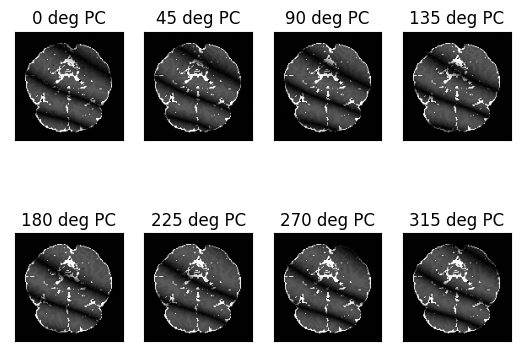

In [ ]:
plot_dataset(data, slice=0)

(500, 128, 128, 4)
0.020401823442101216
0.35873841863166506


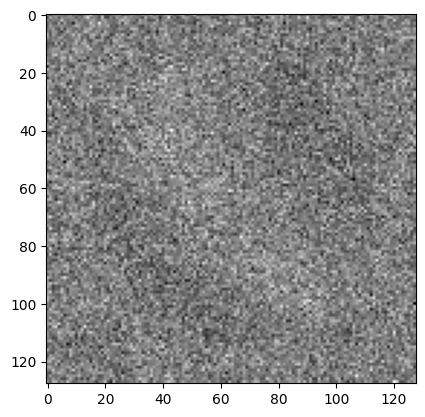

In [ ]:
print(data.shape)
slice = 10
print(np.max(data[slice,:,:,0].real))
print(np.max(data[slice,:,:,2].real))
plt.imshow(data[slice,:,:,0].real)

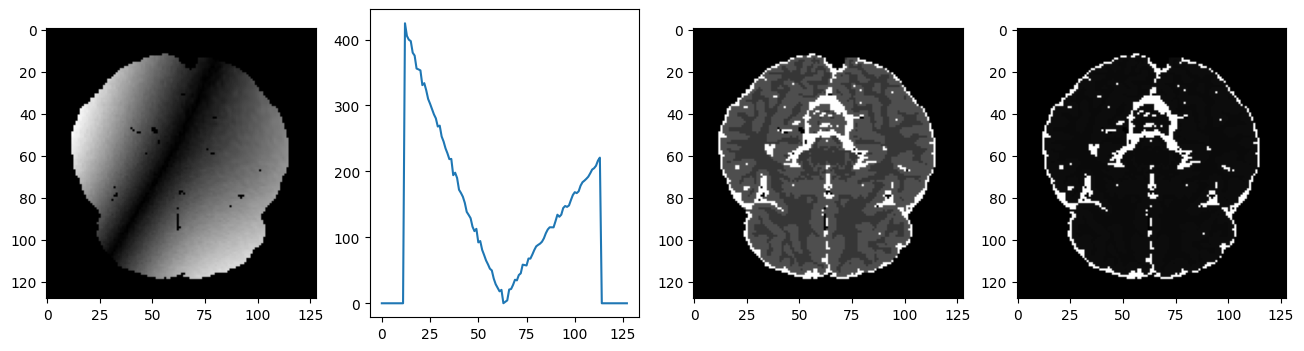

424.6408798254729


In [ ]:
slice = 3
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plt.imshow(np.abs(fieldmap[slice,:,:]))
plt.subplot(1,4,2)
plt.plot(np.abs(fieldmap[slice,50,:]))
plt.subplot(1,4,3)
plt.imshow(np.abs(T1[slice,:,:]))
plt.subplot(1,4,4)
plt.imshow(np.abs(T2[slice,:,:]))
plt.show()

print(np.max(fieldmap[slice,:,:]))

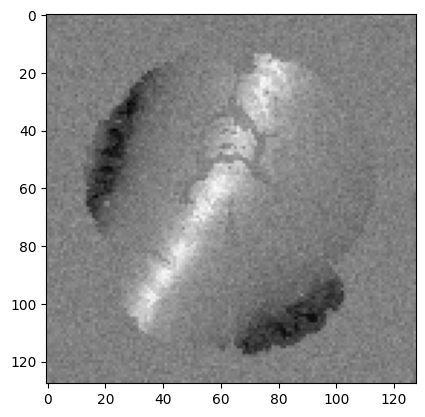

In [ ]:
i = slice
npcs = 8
alpha = np.deg2rad(15)
TR: float = 3e-3
TE: float = 3e-3 / 2
pcs = np.linspace(0, 2 * math.pi, npcs, endpoint=False)
M = ssfp(T1[i, :, :], T2[i, :, :], TR, TE, alpha, field_map=fieldmap[i, :, :], dphi=pcs)
M = add_noise_gaussian(M, sigma=0.001)

plt.imshow(M[:,:,0].real, cmap='gray')
plt.show()

Generating 3d phantom:(500, 434, 362)


100%|██████████| 500/500 [00:05<00:00, 96.81it/s] 


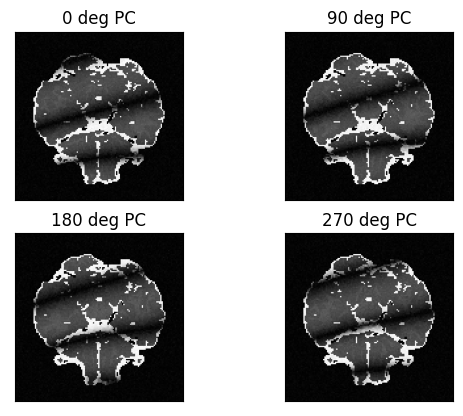

In [ ]:
data = generate_ssfp_dataset(N=128, npcs=4, f=500, alpha=np.deg2rad(60), sigma=0.005, data_indices=[(None, None), (100,200)], rotate=True, deform=True)['M']
plot_dataset(data, slice=0)